## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : 판다스, 넘파이, 통계
- 평가일 : 24. 6. 14
- 성명 : 최환욱
- 점수 :

Q1. df1에서 각 열의 데이터 타입을 아래와 같이 변환한 후 변환된 타입을 확인하세요.
- 'A' 열을 정수형(int)으로 변환
- 'B' 열을 부동 소수점(float)으로 변환
- 'C' 열을 datetime 형식으로 변환

In [146]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({
    'A': ['1', '2', '3', '4'],
    'B': ['5.1', '6.2', '7.3', '8.4'],
    'C': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01']
})
print(df1.info())
df1['A']=df1['A'].astype(int) 				## 'A'열을 정수형(int)으로 변환
df1['B']=df1['B'].astype(float)				## 'B'열을 부동소수점(float)으로 변환
df1['C']=pd.to_datetime(df1['C'])			## 'C'열을 datetime 형식으로 변환

#### 변환된 type확인
print(df1.info())
print(df1.dtypes)
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      int64         
 1   B       4 non-null      float64       
 2   C       4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 224.0 bytes
None
A             int64
B           float64
C    datetime64[ns]
dtype: object


,A,B,C
0,1,5.1,2021-01-01
1,2,6.2,2021-02-01
2,3,7.3,2021-03-01
3,4,8.4,2021-04-01


Q2. 주어진 DataFrame의 N열에서 Series s값을 빼고 결과를 새로운 열 O에 저장 후 출력하세요.

In [6]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "M": [15, 25, 35, 45, 55],
    "N": [100, 200, 300, 400, 500]
})
print(df,'\n')
# Series 생성
s = pd.Series([5, 10, 15, 20, 25])
SR_new=df['N']-s
df['O']=SR_new
df

    M    N
0  15  100
1  25  200
2  35  300
3  45  400
4  55  500 



,M,N,O
0,15,100,95
1,25,200,190
2,35,300,285
3,45,400,380
4,55,500,475


Q3. 주어진 DataFrame의 여러 열에 대해 각기 다른 Series를 더하고, 결과를 새로운 DataFrame으로 반환한 후 각 행의 합계를 계산하여 새로운 열에 추가하여 출력하세요.

In [9]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [10, 20, 30, 40, 50],
    "C": [100, 200, 300, 400, 500]
})

# Series 생성
s1 = pd.Series([5, 5, 5, 5, 5])
s2 = pd.Series([10, 10, 10, 10, 10])
s3 = pd.Series([15, 15, 15, 15, 15])

print(df)
df_new=df.copy()
df_new['A']=df['A']+s1
df_new['B']=df['B']+s2
df_new['C']=df['C']+s3
df_new['D']=df_new.sum(axis=1)
df_new

   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
3  4  40  400
4  5  50  500


,A,B,C,D
0,6,20,115,141
1,7,30,215,252
2,8,40,315,363
3,9,50,415,474
4,10,60,515,585


Q4. 주어진 DataFrame에서 'Category'별로 그룹화하여 각 그룹의 'Value' 열의 평균을 계산하세요.

In [12]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Category": ["A", "B", "A", "B", "C", "A", "C", "B", "A", "C"],
    "Value": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})
print(df.head(10))

### Option-1
df["그룹평균1"]=df.groupby("Category")["Value"].transform(lambda x: x.mean())

### Option-2
df["그룹평균2"]=df['Category'].map(df.groupby("Category")["Value"].mean())
df.head(10)

  Category  Value
0        A     10
1        B     20
2        A     30
3        B     40
4        C     50


,Category,Value,그룹평균1,그룹평균2
0,A,10,47.500000,47.500000
1,B,20,46.666667,46.666667
2,A,30,47.500000,47.500000
3,B,40,46.666667,46.666667
4,C,50,73.333333,73.333333
5,A,60,47.500000,47.500000
6,C,70,73.333333,73.333333
7,B,80,46.666667,46.666667
8,A,90,47.500000,47.500000
9,C,100,73.333333,73.333333


Q5. 주어진 DataFrame에서 'Category'별로 그룹화하여 각 그룹의 'Value' 열의 합계, 평균, 최대값, 최소값을 계산하세요.

In [13]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Category": ["A", "B", "A", "B", "C", "A", "C", "B", "A", "C"],
    "Value": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})

df_agg=df.groupby('Category')['Value'].agg(['sum','mean','max','min'])
df_agg

,sum,mean,max,min
Category,,,,
A,190,47.500000,90,10
B,140,46.666667,80,20
C,220,73.333333,100,50


Q6. 주어진 Series의 각 값에 대해 2배로 변환하는 함수를 적용하여 값을 변환하세요.

In [121]:
import pandas as pd

# Series 생성
s = pd.Series([1, 2, 3, 4, 5])

## Option1
result=s.map(lambda x: x*2)
print(result)

## Option2
def double(x):
    return x*2

result2=s.map(double)
print(result2)


0     2
1     4
2     6
3     8
4    10
dtype: int64
0     2
1     4
2     6
3     8
4    10
dtype: int64


Q7. 주어진 DataFrame의 각 요소에 대해 10보다 크면 2배, 그렇지 않으면 원래의 수를 반영하는 함수를 적용하여 값을 변환하세요.

In [16]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Values": [5, 10, 15, 20, 25]})
df['New_Values']=df['Values'].apply(lambda x: x*2 if x>10 else x)
df

,Values,New_Values
0,5,5
1,10,10
2,15,30
3,20,40
4,25,50


Q8. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.

In [20]:
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
print(customers,'\n')
print(purchases)
Merged=pd.merge(customers,purchases,on='customer_id',how='left').groupby('name')['amount'].sum()

print("\n",Merged)

   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
3            4    David 

   purchase_id  customer_id  amount
0          101            1     250
1          102            2     150
2          103            1     200
3          104            3     300
4          105            2     350

 name
Alice      450.0
Bob        500.0
Charlie    300.0
David        0.0
Name: amount, dtype: float64


Q9. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.

In [22]:
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
print(customers, '\n')

df=customers[(customers['age']>= 30) & (customers['spending'] >= 500)]
df

   customer_id     name  age  spending
0            1    Alice   25       300
1            2      Bob   35       600
2            3  Charlie   30       500
3            4    David   40       700
4            5      Eve   28       400


,customer_id,name,age,spending
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700


Q10. 주어진 df의 날짜 리스트를 datetime 형식으로 변환하고, 변환된 데이터프레임의 년도, 월, 일 열을 추가하시오.

In [23]:
import pandas as pd

# 날짜 문자열 리스트
date_list = ['2023-01-01', '2023-02-15', '2023-03-30']

# 데이터프레임 생성
df = pd.DataFrame(date_list, columns=['date'])
print(df,'\n')

df['New_Date']=pd.to_datetime(df['date']);
df['Year']=df['New_Date'].dt.year
df['month']=df['New_Date'].dt.month
df['day']=df['New_Date'].dt.day
#df['day_of_week']=df['New_Date'].dt.dayofweek
df

,date,New_Date,Year,month,day
0,2023-01-01,2023-01-01,2023,1,1
1,2023-02-15,2023-02-15,2023,2,15
2,2023-03-30,2023-03-30,2023,3,30


Q11. 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성하고, 이 날짜 범위에서 매월 첫 번째 날만 포함하는 데이터프레임을 작성하세요.

In [25]:
rng=pd.date_range('2023-01-01',end='2023-12-31', freq='MS')
DF=pd.DataFrame(np.random.randn(12,1), index=rng, columns=["values"])
DF.head(20)

,values
2023-01-01,0.864663
2023-02-01,1.138937
2023-03-01,-0.319665
2023-04-01,1.546564
2023-05-01,0.958142
2023-06-01,2.979413
2023-07-01,-0.766963
2023-08-01,1.394418
2023-09-01,-0.127101
2023-10-01,-0.373802


Q12.2020년부터 2025년까지의 분기별 기간 범위를 생성하고, 각 분기의 시작과 끝 날짜를 포함하는 데이터프레임을 작성하세요.

- pd.period_range 이용

In [24]:
dates = pd.period_range(start='2020-01-01', end='2025', freq='Q')
### pd.date_range vs. pd_period_range

df=pd.DataFrame({
    'quarter': dates,
    'start_date': dates.start_time.date,
    'end_date': dates.end_time.date
})
df

,quarter,start_date,end_date
0,2020Q1,2020-01-01,2020-03-31
1,2020Q2,2020-04-01,2020-06-30
2,2020Q3,2020-07-01,2020-09-30
3,2020Q4,2020-10-01,2020-12-31
4,2021Q1,2021-01-01,2021-03-31
5,2021Q2,2021-04-01,2021-06-30
6,2021Q3,2021-07-01,2021-09-30
7,2021Q4,2021-10-01,2021-12-31
8,2022Q1,2022-01-01,2022-03-31
9,2022Q2,2022-04-01,2022-06-30


Q13. 주어진 df 에서 2022-01-02 이후의 데이터를 필터링하세요.

In [26]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'value': [1, 2, 3, 4, 5]
})
df['date'] = pd.to_datetime(df['date'])
print(df,'\n')

filtered_df=df[df['date']> '2022-01-02']
filtered_df

        date  value
0 2022-01-01      1
1 2022-01-02      2
2 2022-01-03      3
3 2022-01-04      4
4 2022-01-05      5 



,date,value
2,2022-01-03,3
3,2022-01-04,4
4,2022-01-05,5


Q14. 주어진 데이터프레임에서 주말(토요일과 일요일) 데이터를 필터링하세요.(주말: 5,6)

In [27]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-08', '2022-01-09'],
    'value': [1, 2, 3, 4, 5]
})
df['date'] = pd.to_datetime(df['date'])
print(df,'\n')

df['day of week']=df['date'].dt.dayofweek
weekend_df=df[df['day of week'] >= 5]
weekend_df

        date  value
0 2022-01-01      1
1 2022-01-02      2
2 2022-01-03      3
3 2022-01-08      4
4 2022-01-09      5 



,date,value,day of week
0,2022-01-01,1,5
1,2022-01-02,2,6
3,2022-01-08,4,5
4,2022-01-09,5,6


Q15. array2d에서 슬라이싱을 사용해서 아래와 같이 출력하세요.

array2d = np.arange(1,10).reshape(3,3)

```
[[1 2 3]
[4 5 6]
[7 8 9]]

[[2 3]
[5 6]]

[1 4]
```

In [33]:
array2d = np.arange(1,10).reshape(3,3)
print(array2d,'\n')

#1
print("1st Array")
print(array2d[:3,:3],'\n')
print(array2d,'\n')

#2
print("2nd Array")
print(array2d[:2,1:],'\n')

#3
print("3rd Array")
print(array2d[:2 ,0],'\n')

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

1st Array
[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

2nd Array
[[2 3]
 [5 6]] 

3rd Array
[1 4] 



Q16. 적절한 데이터를 생성하여 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2 x 2 그래프를 작성하세요.

   OrderID  CustID  ProdID  Quantity  Gender  Age  Region  Price  OrderAmount  \
0        1   10679      10         3       0   29       6  41600       124800   
1        2   10269      20        10       1   33       6  22000      1056000   
2        3   10577      20         5       1   32       1  31700       538900   
3        4   10895      10         7       0   30       1  39400       985000   
4        5   10765      10         1       0   33       6  41600        41600   

  AgeGroup PriceCategory            OrderDate   OrderDW OrderTime  Year  \
0      20s    High-Price  2020-02-22 22:13:56  Saturday  22:13:56  2020   
1      30s  Medium-Price  2020-03-04 23:46:08    Sunday  23:46:08  2020   
2      30s  Medium-Price  2020-02-01 22:31:15  Thursday  22:31:15  2020   
3      20s    High-Price  2020-03-01 03:25:56   Tuesday  03:25:56  2020   
4      30s    High-Price  2020-02-15 23:30:19  Thursday  23:30:19  2020   

   Season OrderTimeGroup RegionName  
0  Winter      PrimeTime

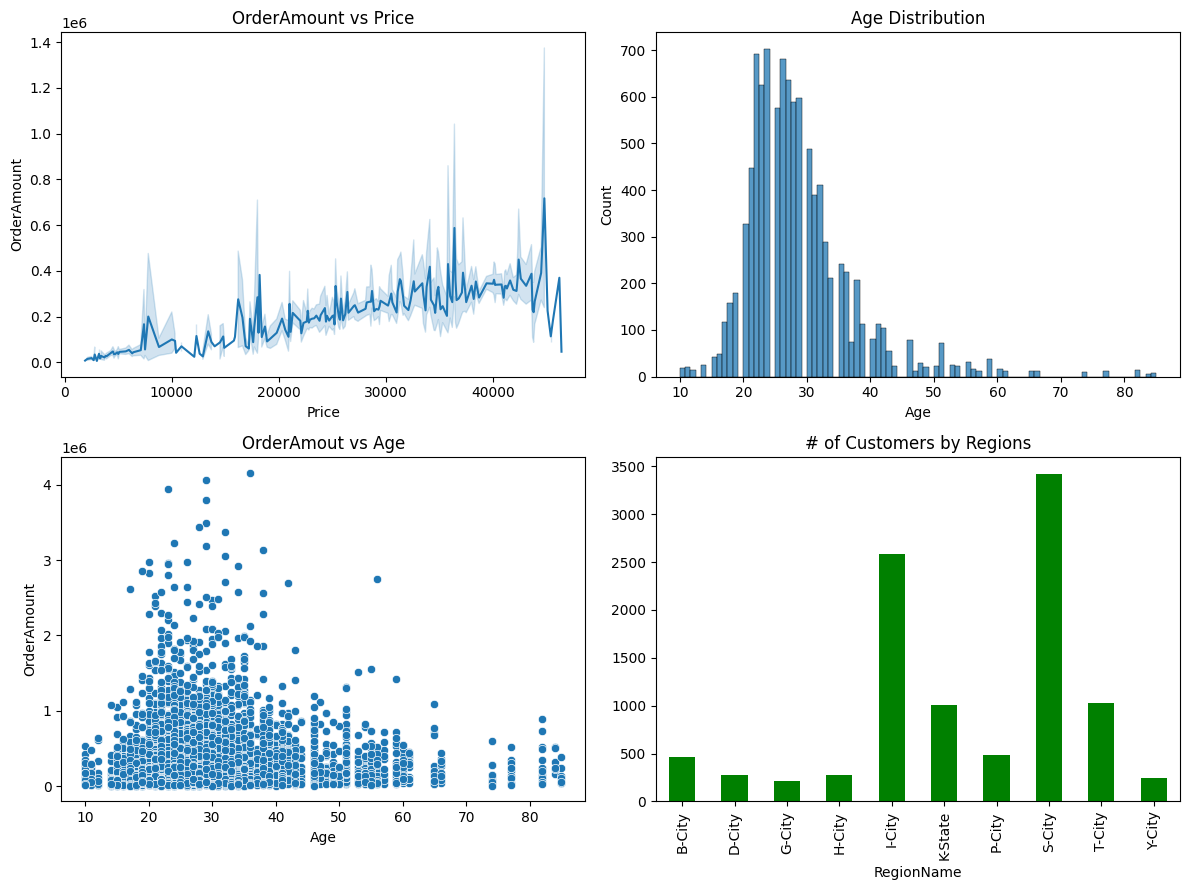

In [119]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/KITA_2024/M3_분석라이브러리/Statistics/Data_2nd.csv'
df = pd.read_csv(file_path)
print(df.head())

data=df.copy()


## 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# 선 그래프
sns.lineplot(data=data, x='Price', y='OrderAmount', ax=axes[0, 0])
axes[0,0].set_title('OrderAmount vs Price')

# 히스토그램
sns.histplot(data=data, x='Age', ax=axes[0, 1])
axes[0,1].set_title('Age Distribution')

# 산점도
sns.scatterplot(data=data, x='Age', y='OrderAmount', ax=axes[1, 0])
axes[1,0].set_title('OrderAmout vs Age')

# 막대 바 그래프
data.groupby(['RegionName']).size().plot(kind='bar', color='g')
axes[1,1].set_title('# of Customers by Regions')

plt.tight_layout()
plt.show()


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q17. 평균이 172.5, 표준편차가 6인 정규 분포를 따르는 아래 데이터를 생성한 후 과제를 수행하세요.

data = stats.norm.rvs(loc=172.5, scale=6, size=10000)

- 생성된 데이터를 사용하여 히스토그램 작성
- 히스토그램의 빈(bin) 수를 조정해서 작성
- 두개의 그래프를 1행 2열로 표현

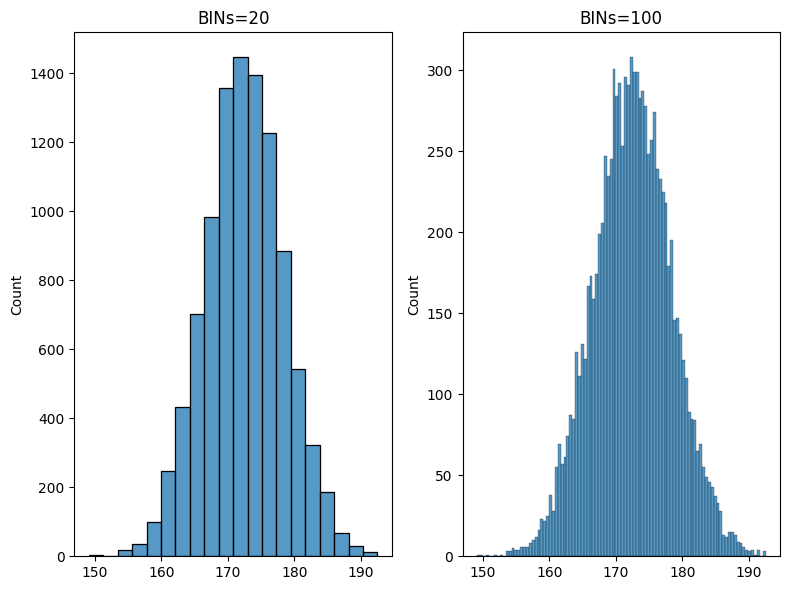

In [50]:
data=np.random.normal(loc=172.5, scale=6, size=10000)
## 그래프 그리기

plt.figure(figsize=(8, 6))
# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(data=data,bins=20)
plt.title('BINs=20')

plt.subplot(1, 2, 2)
sns.histplot(data=data,bins=100)
plt.title('BINs=100')

plt.tight_layout()
plt.show()


Q18. 주어진 숫자 배열(예: [4, 8, 15, 16, 23, 42])에 대해 평균과 중앙값을 계산한 후 배열에 두 개의 극단값을 추가한 후(예: -100, 100), 다시 평균과 중앙값을 계산하고 비교하세요.

In [53]:
Array1=np.array([4,8,15,16,23,42])
mean1=np.mean(Array1)
median1=np.median(Array1)
print(mean1,median1, '\n')
Array2=np.append(Array1,[-100,100])
mean2=np.mean(Array2)
median2=np.median(Array2)
print(mean2,median2, '\n')

print("mean deviation: ",mean1-mean2)
print("median deviation: ",median1-median2)

18.0 15.5 

13.5 15.5 

mean deviation:  4.5
median deviation:  0.0


Q19. 주어진 데이터 배열의 사분위수(제1사분위수, 중앙값, 제3사분위수)를 계산한 후 데이터의 10번째 백분위수와 90번째 백분위수를 계산하여 출력하세요.
- data = np.arange(1000)

In [60]:
large_arr=np.arange(1000)
perc=np.percentile(large_arr, [25, 50, 75])
print("사분위수(제1사분위수, 중앙값, 제3사분위수): ", perc)

## Option1
print("10번째 백분위수: ", np.percentile(large_arr, 10))
print("90번째 백분위수: ", np.percentile(large_arr, 90))

## Option2
large_arr.sort()
print(large_arr[int(0.10*len(large_arr))])       # 10% 분위수
print(large_arr[int(0.90*len(large_arr))])       # 10% 분위수

사분위수(제1사분위수, 중앙값, 제3사분위수):  [249.75 499.5  749.25]
10번째 백분위수:  99.9
90번째 백분위수:  899.1
100
900


Q20. auto-mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# # Google Colab에서 파일 업로드
# from google.colab import files
# uploaded = files.upload()


Saving auto-mpg.csv to auto-mpg (1).csv


In [125]:
file_path = '/content/drive/MyDrive/KITA_2024/M3_분석라이브러리/Pandas/dataset/auto-mpg.csv'
df = pd.read_csv(file_path)
df.set_index('car name',inplace=True)
print(df.head())

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  


In [126]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 28.0+ KB


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [127]:
print(df)

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   
...                         ...        ...           ...        ...     ...   
ford mustang gl            27.0          4         140.0         86    2790   
vw pickup                  44.0          4          97.0         52    2130   
dodge rampage              32.0          4         135.0         84    2295   
ford ranger                28.0          4         120.0         79    2625   
chevy s-10                 31.0          4         1

In [128]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [129]:
import pandas as pd
import numpy as np

# DataFrame을 순회하면서 숫자가 아닌 값을 출력
for index, row in df.iterrows():
    for column in df.columns:
        try:
            pd.to_numeric(row[column])
        except ValueError:
            print(f"인덱스 {index}의 {column} 컬럼에는 숫자가 아닌 값이 있습니다: {row[column]}")

## 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()


인덱스 ford pinto의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?
인덱스 ford maverick의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?
인덱스 renault lecar deluxe의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?
인덱스 ford mustang cobra의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?
인덱스 renault 18i의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?
인덱스 amc concord dl의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?


In [130]:
## 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

In [131]:
df.loc['ford pinto']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
ford pinto,19.0,4,122.0,85.0,2310,18.5,73,1
ford pinto,26.0,4,122.0,80.0,2451,16.5,74,1
ford pinto,23.0,4,140.0,83.0,2639,17.0,75,1
ford pinto,18.0,6,171.0,97.0,2984,14.5,75,1
ford pinto,26.5,4,140.0,72.0,2565,13.6,76,1


In [132]:
df.info()
#### 결측치 drop에 따라 398 ==> 392 entries

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 35.7+ KB


In [133]:
df_cor=df.corr()
df_sorted=df_cor.abs().sort_values(by='mpg', ascending=False)
print(df_sorted)
df_sorted=df_cor.sort_values(by='mpg', ascending=False)
df_sorted

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000   0.777618      0.805127    0.778427  0.832244   
weight        0.832244   0.897527      0.932994    0.864538  1.000000   
displacement  0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower    0.778427   0.842983      0.897257    1.000000  0.864538   
cylinders     0.777618   1.000000      0.950823    0.842983  0.897527   
model year    0.580541   0.345647      0.369855    0.416361  0.309120   
origin        0.565209   0.568932      0.614535    0.455171  0.585005   
acceleration  0.423329   0.504683      0.543800    0.689196  0.416839   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
weight            0.416839    0.309120  0.585005  
displacement      0.543800    0.369855  0.614535  
horsepower        0.689196    0.416361  0.455171  
cylinders         0.504683    0.345647  0.568932  
model year        0.290316    1.0000

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005


In [134]:
# 탐색적 데이터 분석

<Figure size 1200x1200 with 0 Axes>

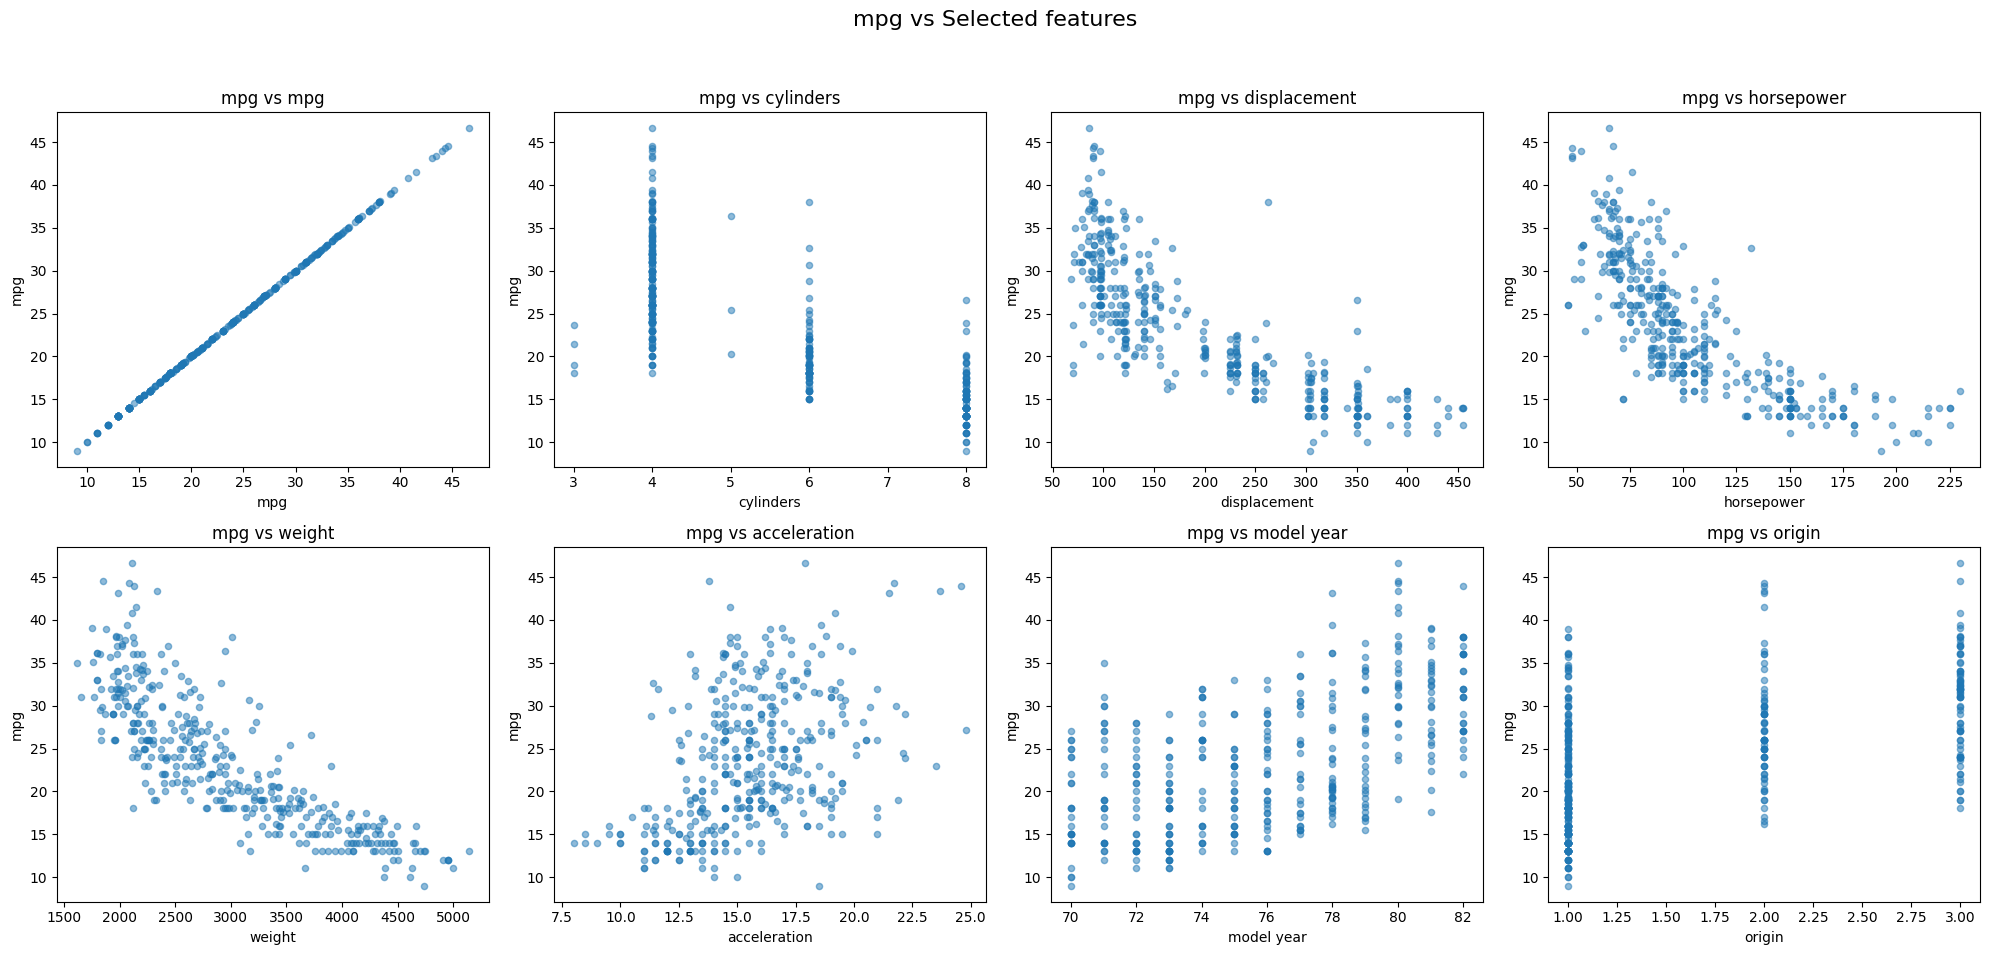

In [135]:
import matplotlib.pyplot as plt

# DF 열수
num_columns=len(df.columns)
# 그래프 크기 결정
plt.figure(figsize=(12,12))
columns=df.columns
target='mpg'
nocols=4
fig, axes=plt.subplots(nrows=2, ncols=nocols, figsize=(20, 10))
for i, col in enumerate(columns):
  row,col_idx = divmod(i,nocols)
  df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
  axes[row,col_idx].set_title(f"{target} vs {col}")
fig.suptitle(f'{target} vs Selected features', fontsize=16);
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
plt.show()


In [136]:
df["mpmy"]=df.groupby("model year")["mpg"].transform(lambda x: round(x.mean(),2))
df["mpog"]=df.groupby("origin")["mpg"].transform(lambda x: round(x.mean(),2))


In [137]:
df_cor=df.corr()

target_variable='mpg'
correlation_threshold=0.5
print(df_cor[target_variable])
print(df_cor[target_variable][abs(df_cor[target_variable]) > correlation_threshold])
corr_features=df_cor[target_variable][abs(df_cor[target_variable]) > correlation_threshold].index.tolist()

print(corr_features)

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model year      0.580541
origin          0.565209
mpmy            0.655556
mpog            0.576063
Name: mpg, dtype: float64
mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
model year      0.580541
origin          0.565209
mpmy            0.655556
mpog            0.576063
Name: mpg, dtype: float64
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin', 'mpmy', 'mpog']


## Correlation
 - MPG (miles per gallon)에 가장 sensitivity가 높은 parameter:
  - weight,displacement,horsepower,cylinders,model year, origion,acceleration 순

## Normalization
 - Norm이 필요한 params: wt, cyl, disp, hp, drat, carb, gear, qsec
 - Norm이 필요 없는 params: vs, am

## Parameter 선정
 - Correlation Coeff.가 0.5 미만 drop ==> drop  am, carb, gear, qsec
 - MPG에 strong correlation을 가지지만 다른 독립변수와 nearly 1:1 종속되어 있는 params: cyl vs. disp. ==>  상대적으로 corr이 높은 cyl 선택

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year']

## 파생 변수 발굴
- 'ppw' 파생 변수 추가 (Power to weight ratio)
  - analysis_df['ppw'] = df['horsepower'] / df['weight']
- 'cpd' 파생 변수 추가 (Cylinders per displacement)
  - analysis_df['cpd'] = df['cylinders'] / df['displacement']
- 'mpgr' 파생 변수 추가 (Miles per gallon per gear)
  - analysis_df['apw'] = df['acceleration'] / df['weight']

## 최종 parameters:
 - Norm 필요: 'mpg','cyl','hp','drat','wt','ppw', 'cyl/disp'
 - Norm 불필요: 'vs'

In [138]:
print(f"{target_variable}: {corr_features}")

mpg: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin', 'mpmy', 'mpog']


In [139]:
from sklearn.preprocessing import StandardScaler

correlated_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year']

# 분석용 데이터셋 구축
analysis_df = df[correlated_features]
target_variable = 'mpg'


# 'ppw' 파생 변수 추가 (Power to weight ratio)
analysis_df['ppw'] = df['horsepower'] / df['weight']

# 'cpd' 파생 변수 추가 (Cylinders per displacement)
analysis_df['cpd'] = df['cylinders'] / df['displacement']

# 'mpgr' 파생 변수 추가 (Miles per gallon per gear)
analysis_df['apw'] = df['acceleration'] / df['weight']

# 데이터셋 확인
print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

                            mpg  cylinders  displacement  horsepower  weight  \
car name                                                                       
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                           model year       ppw       cpd       apw  
car name                                                             
chevrolet chevelle malibu          70  0.037100  0.026059  0.003425  
buick skylark 320                  70  0.044679  0.022857  0.003114  
plymouth satellite                 70  0.043655  0.025157  0.003201  
amc rebel sst                      70  0.043694  0.026316  0.003495  
ford torino        

<ipython-input-139-d1e2aeef368a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['ppw'] = df['horsepower'] / df['weight']
<ipython-input-139-d1e2aeef368a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['cpd'] = df['cylinders'] / df['displacement']
<ipython-input-139-d1e2aeef368a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

## Scaling 후 parameter들의 특징/상관관계 plot  점검

<Figure size 1200x1200 with 0 Axes>

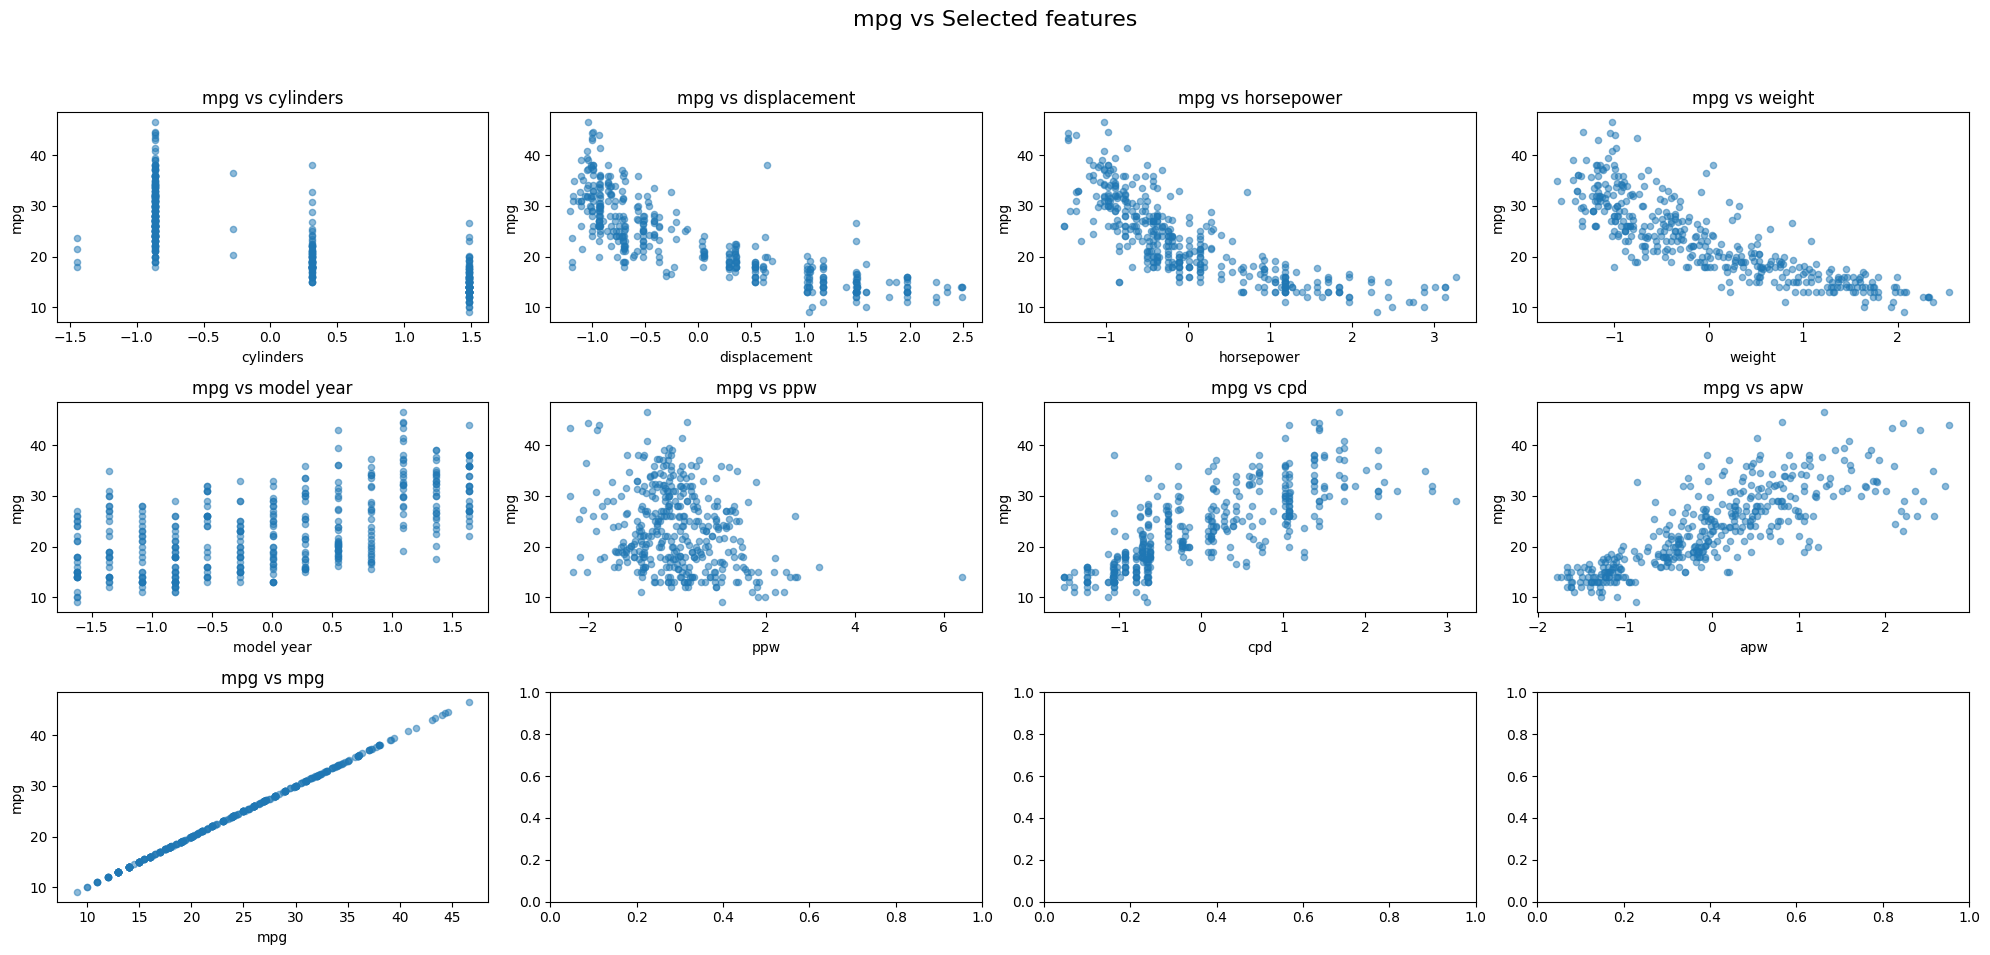

In [140]:
import matplotlib.pyplot as plt

# DF 열수
num_columns=len(scaled_df.columns)
# 그래프 크기 결정
plt.figure(figsize=(12,12))
columns=scaled_df.columns
target='mpg'
nocols=4
fig, axes=plt.subplots(nrows=3, ncols=nocols, figsize=(20, 10))
for i, col in enumerate(columns):
  row,col_idx = divmod(i,nocols)
  scaled_df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
  axes[row,col_idx].set_title(f"{target} vs {col}")
fig.suptitle(f'{target} vs Selected features', fontsize=16);
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
plt.show()

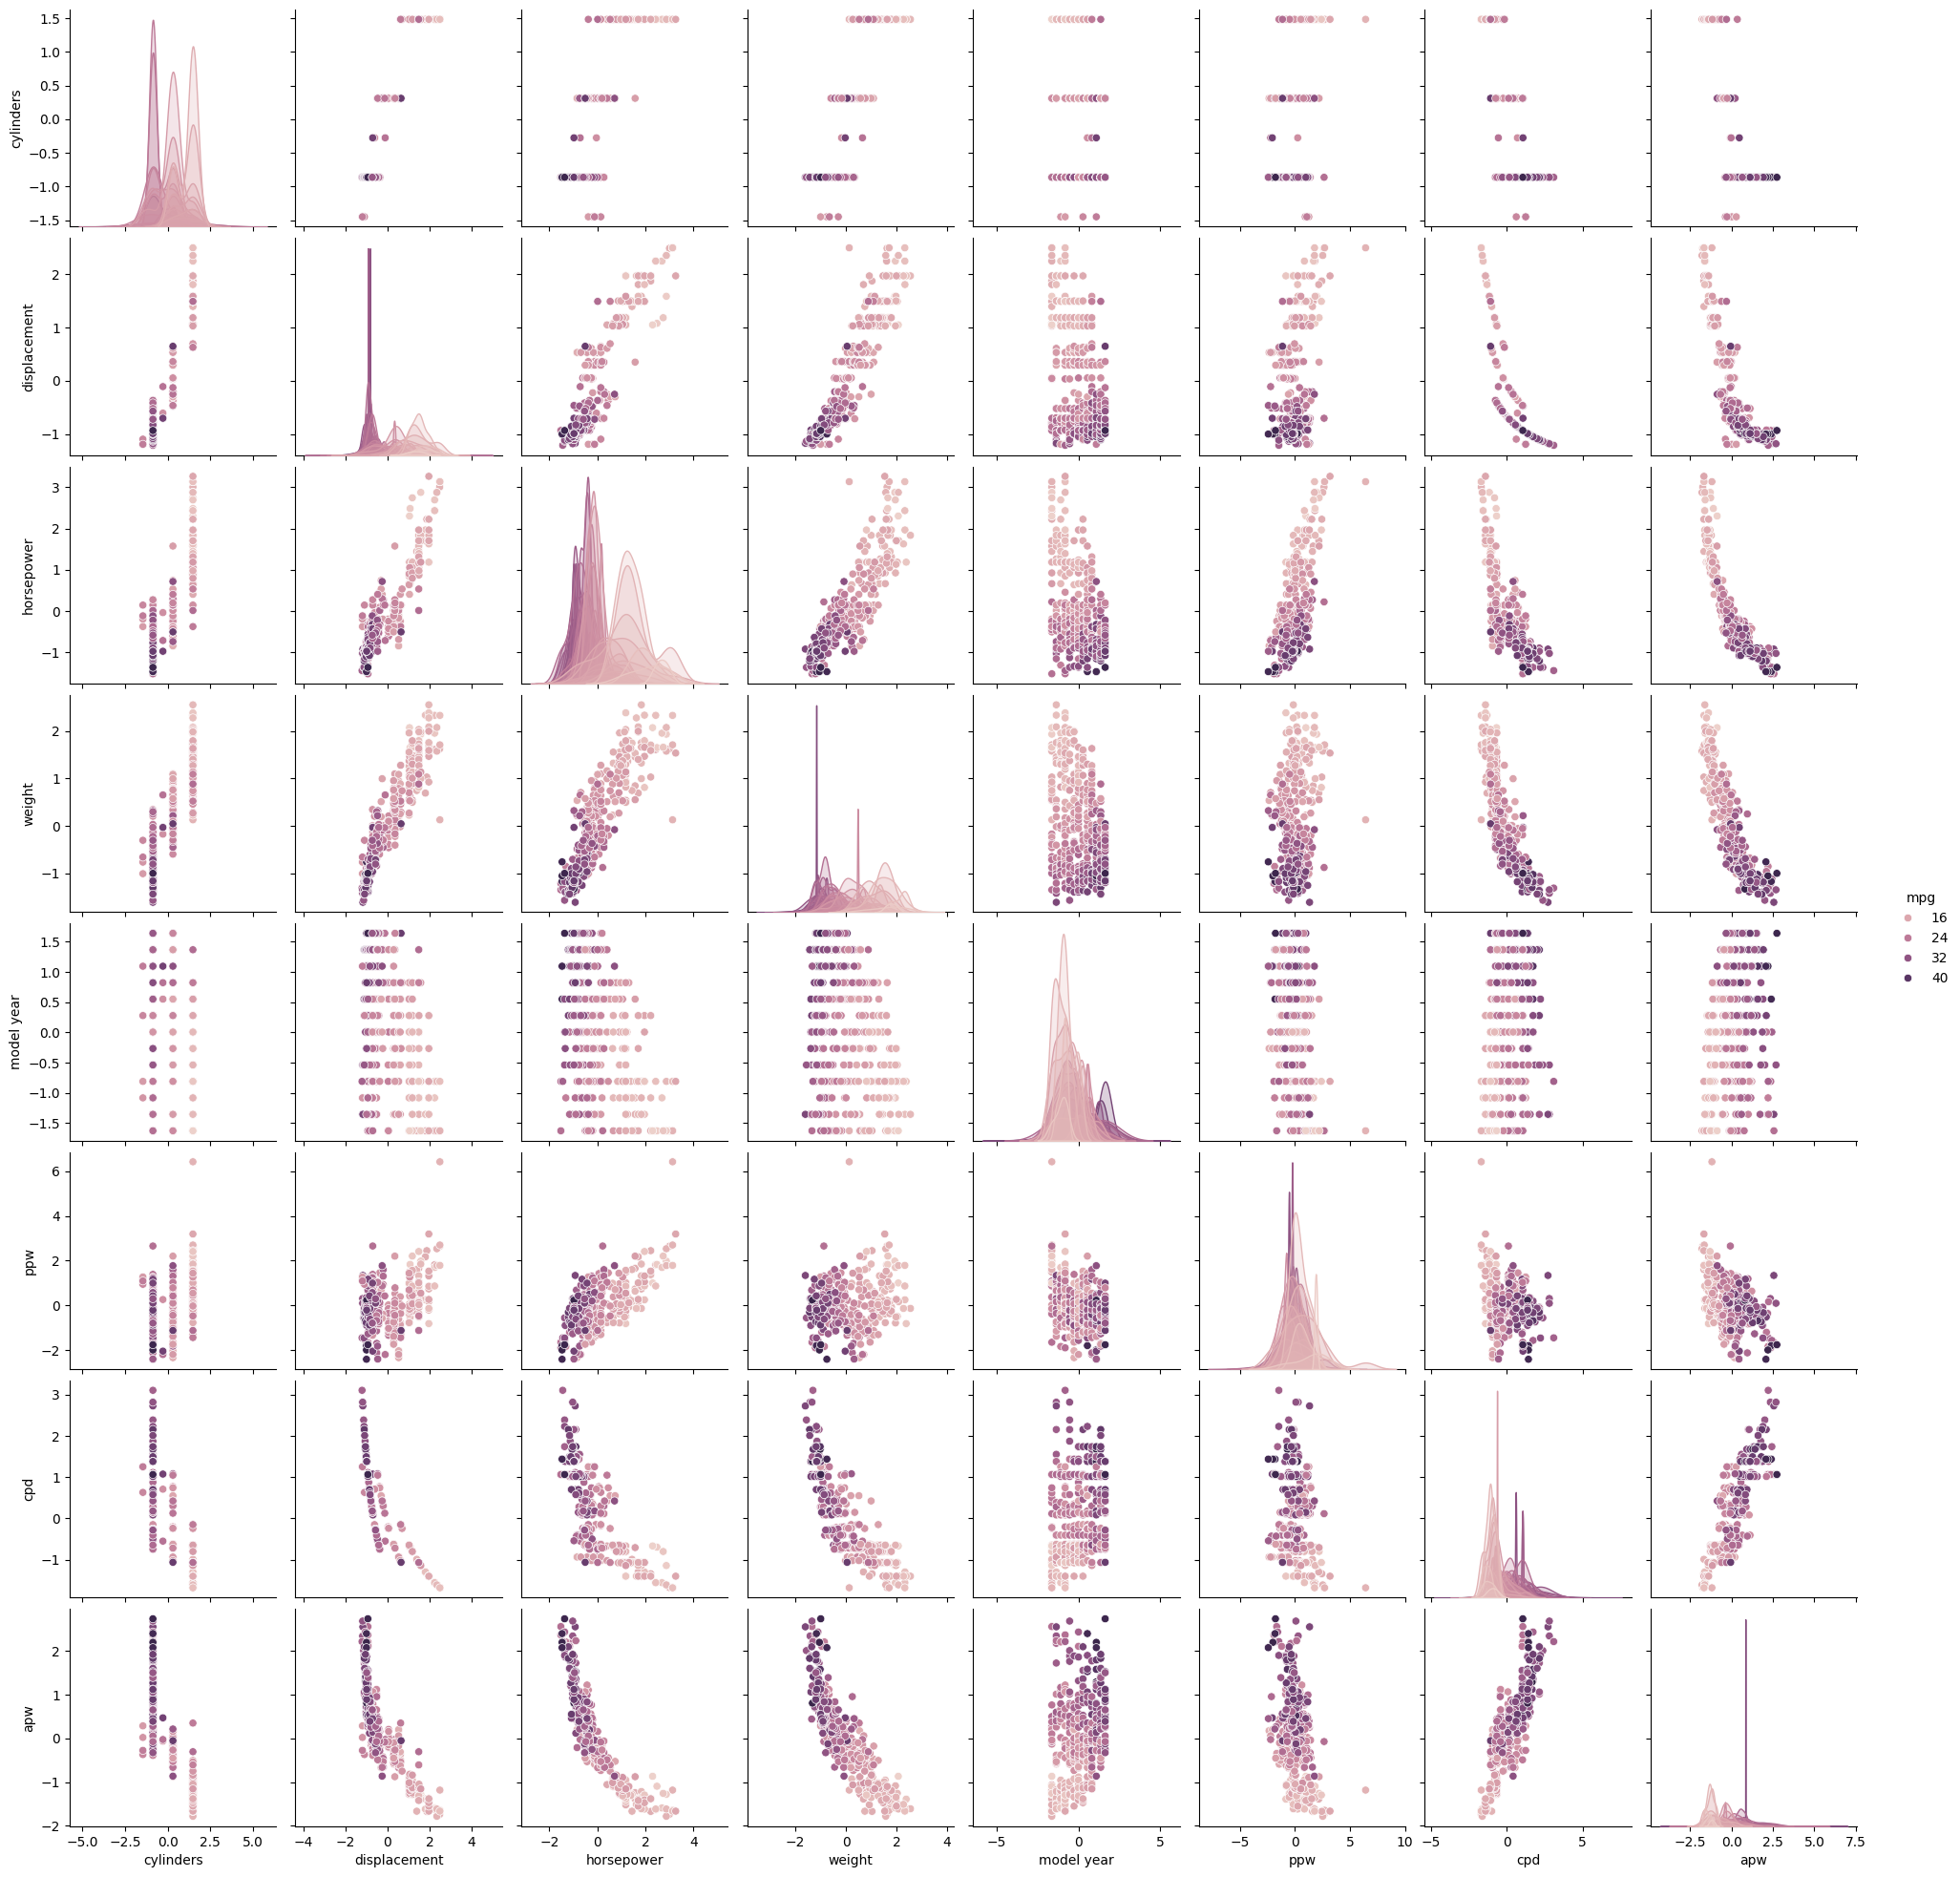

In [141]:
import seaborn as sns
sns.pairplot(scaled_df, hue='mpg')

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 10.36
Root Mean Squared Error: 3.22
R-squared: 0.8
